In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
import sklearn
import networkx

# REPORT_3

#### Belén Ximena Herrada Ruiz - 20203026

#### Lectura: Demanda y Oferta agregada en presencia de Políticas Monetarias no Convencionales - Waldo Mendoza

El artículo ‘Demanda y Oferta agregada en presencia de Políticas Monetarias no Convencionales’ de Waldo Mendoza tiene cómo objetivo principal modelas la política monetaria no convencional para incorporar las innovaciones de la política monetaria, específicamente demostrar la relevancia de los “viejos modelos y métodos” con respecto a problemas macroeconómicos contemporáneos. 

Para poder realizar el desarrollo de este objetivo se ha podido identificar un acercamiento realizado en base a la crisis internacional de 2008-2009 radica desde Estados Unidos y su impacto mundial. Esta contextualización puede ser determinada cómo una fortaleza, ya que le da valoración a la coyuntura internacional a través del reconocimiento de factores externos. Asimismo, bajo esta misma línea, otra fortaleza encontrada ha sido la identificación de la influencia de potencias, como es el caso de EEUU, sobre la configuración de la política monetaria mundial al mencionar el estado de la economía americana desde la crisis. De igual manera, se ha evidenciado la importancia  de la multiplicidad de actores dentro del plan económico para la recuperación de la economía, sobre todo, el accionar del banco central como el la Reserva Federal (Fed) al realizar una ronda reducción de la tasa de interés. Sin embargo, una de las debilidades que se podría considerar sería la falta de consideración de problemáticas actuales, como la globalización , migración y el cambio climático que tiene un peso importante en la agenda económica mundial para la relevancia de los métodos. Por otro lado, la aproximación a “viejos métodos” y su análisis con respecto a la utilización de instrumentos no convencionales puede considerarse como la contribución principal del autor, como la intervención directa en el mercado de bonos de largo plazo y una trayectoria de tasa de interés de corto plazo, lo que marca una diferencia del modelo IS-LM convencional. Esto demuestra la re-valoración, y relevancia actual que puede tener los trabajos Keynes, Hicks y Tobin. 

Por último, uno de los próximos acercamientos que considero se debería realizar es la consideración de otros aspectos sociales para optimizar el desarrollo de la economía mundial, complementando a propuestas económicas ya trazadas. Tal cómo es propuesto por Leal Villegas y Vargas Mendoza, quienes hacen énfasis en la desigualdad económica actual y la necesidad de destacar a las diversa condiciones, como  la productividad, la participación de cada país en la producción, los salarios, como variables que atraviesan el mercado mundial y poseen también una gran significancia en la actualidad. 


#### Codigos trabajados con Belém Herrada Ruiz 20203026 
# Ejercicio 1

## MODELO IS-LM

La Ecuación de curva IS:

$$ r= \frac{\beta_0}{h}-\frac{\beta_1}{h}Y  $$

donde

$ \beta_0 = C_o + I_o + G_o + X_o $  

$ \beta_1 = 1 - (b - m)(1 - t) $

La ecuación de curva LM:

$$ r = -\frac{1}{j} \frac{M_0^s}{P_0}+ \frac{k}{j}Y  $$

Ambas son ecuaciones simultaneas. Todos los parámetros son positivos.Por lo tanto, la propensión marginal a consumir esta entre cero y uno

La curca IS y LM, logran un punto de equilibrio al intersectarse. donde las variables importantes son $Y$ y $r$.

Se igualan ambas ecuaciones:

$$ \frac{\beta_0}{h}-\frac{\beta_1}{h}Y = -\frac{1}{j} \frac{M_0^s}{P_0}+ \frac{k}{j}Y$$

$$\frac{k}{j}Y +\frac{\beta_1}{h}Y =\frac{\beta_0}{h}+\frac{1}{j} \frac{M_0^s}{P_0} $$

$$ Y\frac{hk+j\beta_1}{jh}=\frac{\beta_0}{h}+\frac{1}{j} \frac{M_0^s}{P_0} $$

$$ Y_e=\frac{\beta_0 j}{hk+j\beta_1}+ \frac{h}{hk+j\beta_1}\frac{M_0^s}{P_0}$$

Para hallar $r_e$ reemplazamos 
$$ Y_e= \frac{\beta_0}{\beta_1}-\frac{r_e h}{\beta_1}  $$

entonces:

$$ \frac{\beta_0}{\beta_1}-\frac{r_e h}{\beta_1}=\frac{\beta_0 j}{hk+j\beta_1}+ \frac{h}{hk+j\beta_1}\frac{M_0^s}{P_0}$$

$$r_e=\frac{\beta_0 k}{hk+j\beta_1}- \frac{\beta_1}{hk+j\beta_1}\frac{M_0^s}{P_0}  $$

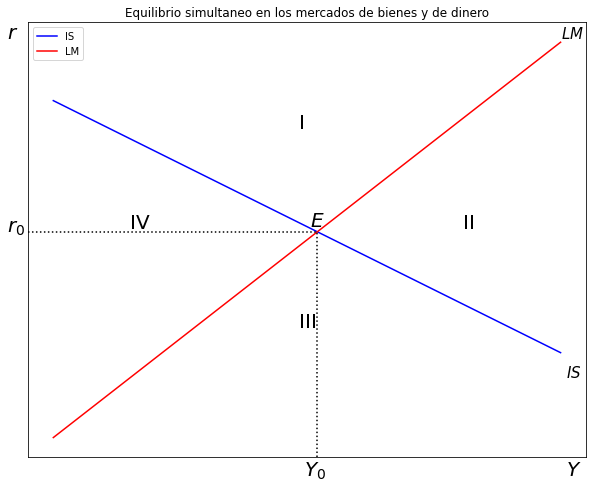

In [58]:

# Parámetros-Curva IS
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8
Y = np.arange(Y_size)
# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS
r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

# Curva LM 
# Parámetros Y_size e Y 
k = 2
j = 1                
Ms = 200             
P  = 20               
# Ecuación LM
def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

# Gráfico del modelo IS-LM
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curva IS
ax.plot(Y, r_is, label = "IS", color = "blue") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "red")  #LM


ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())


# Graficar  - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica  Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Textos 
plt.text(50,96, '$E$', fontsize = 20, color = 'black')
plt.text(-9,93, '$r_0$', fontsize = 20, color = 'black')
plt.text(49,-29, '$Y_0$', fontsize = 20, color = 'black')
plt.text(100,-29, '$Y$', fontsize = 20, color = 'black')
plt.text(-9,190, '$r$', fontsize = 20, color = 'black')

plt.text(99,190, '$LM$', fontsize = 15, color = 'black')
plt.text(100,20, '$IS$', fontsize = 15, color = 'black')
plt.text(80,95, 'II', fontsize = 20, color = 'black')
plt.text(15,95, 'IV', fontsize = 20, color = 'black')
plt.text(48,145, 'I', fontsize = 20, color = 'black')
plt.text(48,45, 'III', fontsize = 20, color = 'black')

# Título, ejes y leyenda
ax.set(title="Equilibrio simultaneo en los mercados de bienes y de dinero")
ax.legend()

plt.show()

## Estatica Comparativa
1) Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal ($∆G_0<0$). El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de Dinero

Si disminuimos el gasto fiscal entonces la demanda agregada disminuye.Por lo tanto, el mercado debe ajustar, asi el producto debe regularce y debe caer

$$ G_0↓ → DA↓ → DA < Y → Y↓ $$

- Mercado de dinero

Ya que el producto se ha reducido,esto implica que la demanda de dinero en fisico cayera, lo cual genera una desequuilibrio en el mercado en el que la demanda era menor a la oferta.Por ende, el precio del dinero cayera 

$$ Y↓ → Md↓ → Md < Ms → r↓ $$


In [60]:
#Matematicamente
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [61]:
df_Y_eq_Go = diff(Y_eq,Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go) 

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [62]:
df_r_eq_Go =  diff(r_eq,Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  #diferencial positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


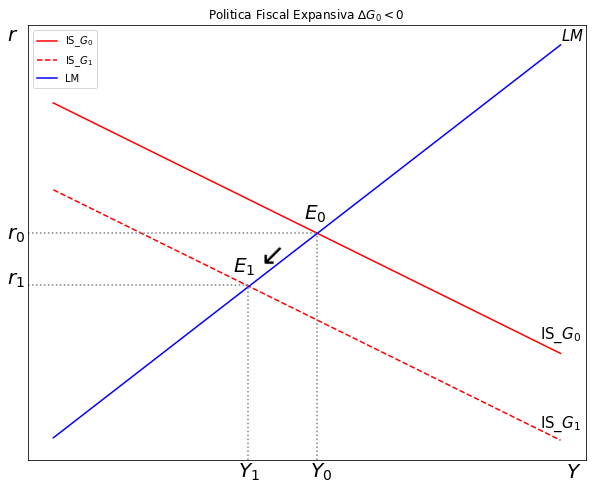

In [44]:

# Parámetros - Curva IS 
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8
Y = np.arange(Y_size)
# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

# Curva LM ORIGINAL
# Parámetros
k = 2
j = 1                
Ms = 200             
P  = 20               
# Ecuación
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# NUEVA curva IS: reducción Gasto de Gobienro (Go)
# nuevo parametro
Go_m= 15

def r_IS(b, m, t, Co, Io, Go_m, Xo, h, Y):
    r_IS = (Co + Io + Go_m + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go_m, Xo, h, Y)

# Gráfico

y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_$G_0$", color = "red") #IS_orginal
ax.plot(Y, r_G, label = "IS_$G_1$", color = "red", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "blue")  #LM_original

# Texto y figuras 
#E0
plt.axvline(x=51.5,ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
plt.text(49,100, '$E_0$', fontsize = 20, color = 'black')
plt.text(-9,90, '$r_0$', fontsize = 20, color = 'black')
plt.text(50,-30, '$Y_0$', fontsize = 20, color = 'black')

#E1
plt.axvline(x=38,  ymin= 0, ymax= 0.40, linestyle = ":", color = "grey")
plt.axhline(y=67, xmin= 0, xmax= 0.40, linestyle = ":", color = "grey")
plt.text(35,73, '$E_1$', fontsize = 20, color = 'black')
plt.text(-9,67, '$r_1$', fontsize = 20, color = 'black')
plt.text(36,-30, '$Y_1$', fontsize = 20, color = 'black')

# Y, r, LM, IS_G0, IS_G1



plt.text(99,190, '$LM$', fontsize = 15, color = 'black')
plt.text(95,40, 'IS_$G_0$', fontsize = 15, color = 'black')
plt.text(95,-5, 'IS_$G_1$', fontsize = 15, color = 'black')
plt.text(39,75, '$←$', fontsize = 30, color = 'black',rotation=45)


ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.text(-9,190, '$r$', fontsize = 20, color = 'black')
plt.text(100,-30, '$Y$', fontsize = 20, color = 'black')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Expansiva $∆G_0<0$ ")
ax.legend()

plt.show()

2) Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria($∆M_s<0$) . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de Dinero

Al disminuir la masa monetaria, el mercado debe ajustar, es decir, la demanda no cambia, por lo tanto, a mucho incremento de dinero, sucede que el precio del dinero sube ya que la cantidad de dinero no es la suficiente.

$$ Ms↓ → M_0↓ → M_0 > Md → r↑ $$

- Mercado de dinero

debido a que la taza aumenta, origina que la inversion se reduzca, por lo que la demanda agregada se reduce, y eston genera al producto se deba ajustar, dicho otro modo se debe reducir

$$ r↑ → I↓ → DA < Y → Y↓ $$


In [52]:
#  variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [53]:
df_r_eq_Ms = diff(r_eq,Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [54]:
df_Y_eq_Ms = diff(Y_eq,Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [55]:

# Parámetros - Curva IS 
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


# Parámetros - Curva LM 
k = 2
j = 1                
Ms = 500             
P  = 20               
Y = np.arange(Y_size)


def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [56]:
#  parámetro cambiado
Ms_m = 50


def i_LM_Ms( k, j, Ms_m, P, Y):
    i_LM = (-Ms_m/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms_m, P, Y)

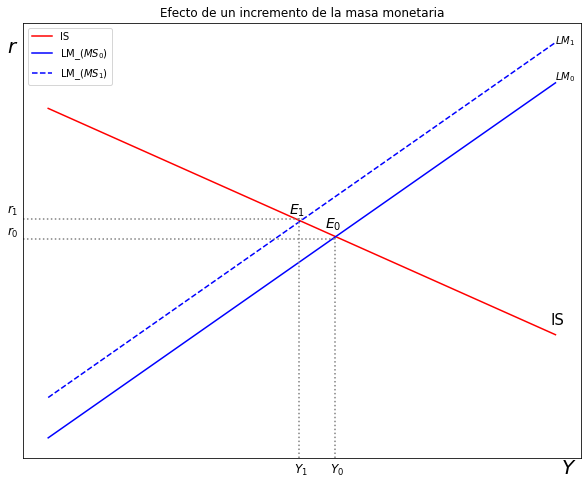

In [57]:
# Gráfico


y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))


ax.plot(Y, r, label = "IS", color = "red") #IS_orginal
ax.plot(Y, i, label="LM_($MS_0$)", color = "blue")  #LM_original
ax.plot(Y, i_Ms, label="LM_($MS_1$)", color = "blue", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=49,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=56,  ymin= 0, ymax= 0.51, linestyle = ":", color = "grey")
plt.axhline(y=86, xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
plt.text(47,100, '$E_1$', fontsize = 14, color = 'black')
plt.axhline(y=97, xmin= 0, xmax= 0.50, linestyle = ":", color = "grey")

# Textos 
plt.text(54,92, '$E_0$', fontsize = 14, color = 'black')
plt.text(-8,88, '$r_0$', fontsize = 12, color = 'black')
plt.text(55,-45, '$Y_0$', fontsize = 12, color = 'black')

plt.text(48,-45, '$Y_1$', fontsize = 12, color = 'black')
plt.text(-8,100, '$r_1$', fontsize = 12, color = 'black')


ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.text(-8,190, '$r$', fontsize = 20, color = 'black')
plt.text(100,-45, '$Y$', fontsize = 20, color = 'black')

plt.text(99,195, '$LM_1$', fontsize = 10, color = 'black')
plt.text(99,175, '$LM_0$', fontsize = 10, color = 'black')
plt.text(98,38, 'IS', fontsize = 15, color = 'black')

# Título, ejes y leyenda
ax.set(title="Efecto de un incremento de la masa monetaria")
ax.legend()

plt.show()

3) Analice los efectos sobre las variables endógenas Y, r de un incremento de la tasa de impuestos.($∆t>0$) . El análisis debe ser intuitivo, matemático y gráfico.

$$∆t>0→↑t$$

$$t↑ → ↑r$$

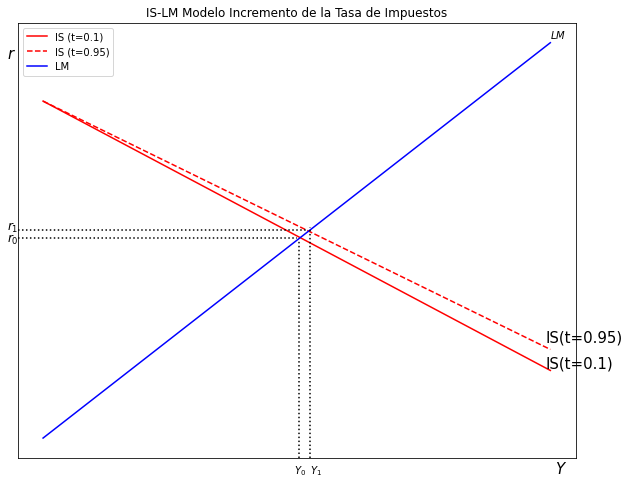

In [51]:
Y_size = 100 
Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t1 = 0.1
Y = np.arange(Y_size)

def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS
r_is = r_IS(b, m, t1, Co, Io, Go, Xo, h, Y)

t2 = 0.95
r_is1 = r_IS(b, m, t2, Co, Io, Go, Xo, h, Y)

k = 2
j = 1                
Ms = 200             
P  = 20               
Y = np.arange(Y_size)

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(Y, r_is, label = 'IS (t=0.1)', color = "red") #IS

ax.plot(Y, r_is1, label= 'IS (t=0.95)', color = "red" , linestyle = 'dashed')  #IS
 
ax.plot(Y, r_lm, label='LM ', color = "blue")  #LM

plt.axvline(x=50,  ymin= 0, ymax= 0.5, linestyle = ":", color = "black")
plt.axhline(y=90, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")
plt.axvline(x=52,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
plt.axhline(y=94, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

plt.text(99,190, '$LM$', fontsize = 10, color = 'black')
plt.text(98,38, 'IS(t=0.95)', fontsize = 15, color = 'black')
plt.text(98,25, 'IS(t=0.1)', fontsize = 15, color = 'black')

plt.text(-7,94, '$r_1$', fontsize = 12, color = 'black')
plt.text(-7,88, '$r_0$', fontsize = 12, color = 'black')
plt.text(-7,180, '$r$', fontsize = 15, color = 'black')

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.text(52,-28, '$Y_1$', fontsize = 10, color = 'black')
plt.text(49,-28, '$Y_0$', fontsize = 10, color = 'black')
plt.text(100,-28, '$Y$', fontsize = 15, color = 'black')

ax.set(title="IS-LM Modelo Incremento de la Tasa de Impuestos")
ax.legend()

plt.show()